In [ ]:
#importing library
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
import os
import numpy as np

import math, time, random, datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier


import warnings
import missingno

Uploading dataset

In [ ]:
from google.colab import files

In [ ]:
#uploading train dataset

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
#uploading test dataset

uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
#uploading gender dataset
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [ ]:
#importing the datas given from titanic dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')


Explore the dataset for better understanding


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#viewing imported data from genderSubmission.csv
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
gender_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [ ]:
#checking the number of rows and columns of the dataset given

print(train.shape)
print(test.shape) 
print(gender_submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [ ]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
test.columns.values 

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
gender_submission.columns.values

array(['PassengerId', 'Survived'], dtype=object)

In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Let's search for data that are missing. In this count atributes we can see that Age data is less then it is supposed to be. shell dig more.**

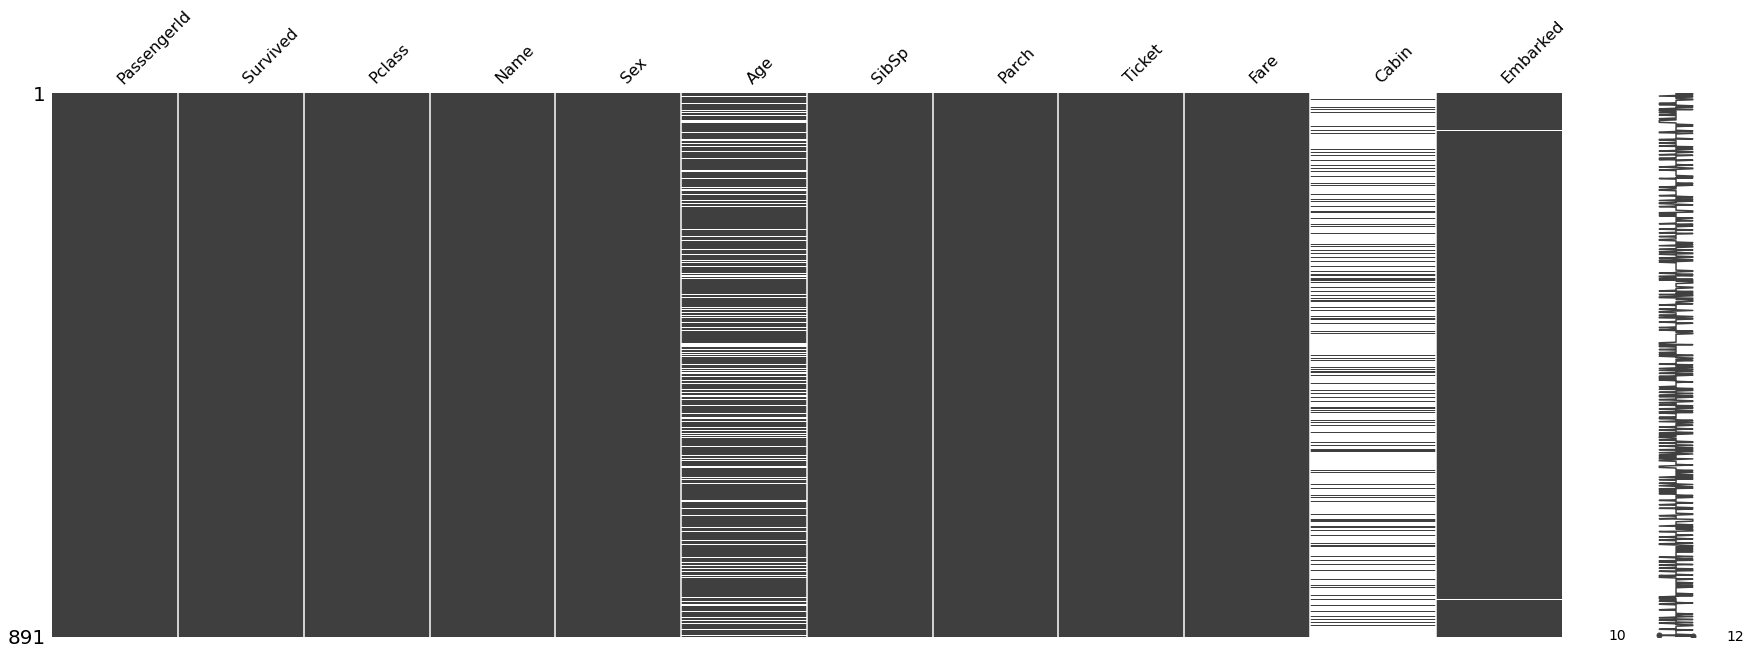

In [ ]:
#visualizing data
missingno.matrix(train, figsize=  (30,10))

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#  def find_missing_value(df, columns):

#     missing_vals = {}
#     print("number of missing Value for each columns")
#     df_length = len(df)
#     for column in columns:
#        total_column_values = df[column].value_counts().sum()
#        missing_vals[column] = df_length - total_column_values 
#        return missing_vals

# missing_values = find_missing_value(train, columns=train.columns)
# missing_values

In [ ]:
 train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we can clearly indentify that the age and cabin columns has a lot of missing values.


In [ ]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [ ]:
#different types of datas in the dataset 
train.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


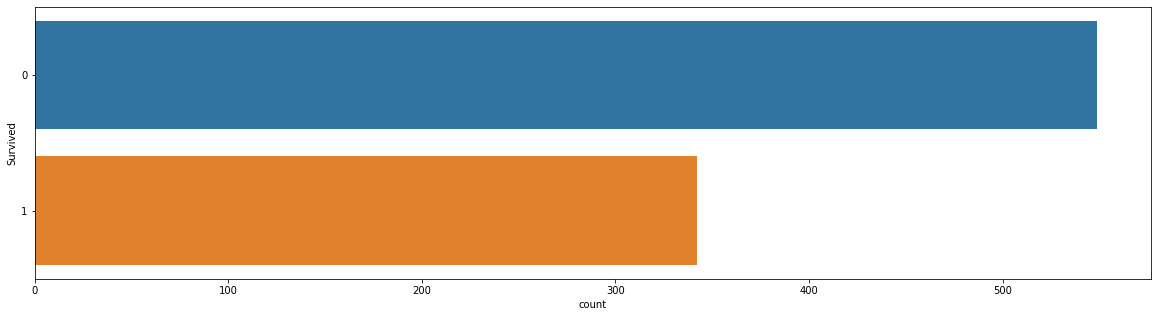

In [ ]:
#visualizing data
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [ ]:
df_bin['Survived']= train['Survived']
df_con['Survived']= train['Survived']

In [ ]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


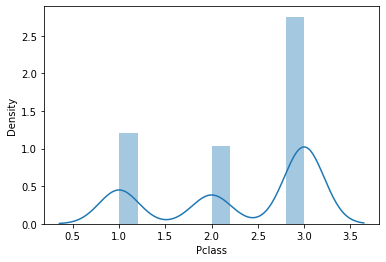

In [ ]:
#visualizing data
sns.distplot(train.Pclass)

In [ ]:
df_bin['Pclass']= train['Pclass']
df_con['Pclass']= train['Pclass']

In [ ]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [ ]:
train.Name.value_counts()[:10]

Smart, Mr. John Montgomery                    1
Odahl, Mr. Nils Martin                        1
O'Sullivan, Miss. Bridget Mary                1
Lahtinen, Mrs. William (Anna Sylfven)         1
Svensson, Mr. Olof                            1
Mangan, Miss. Mary                            1
Sedgwick, Mr. Charles Frederick Waddington    1
Henry, Miss. Delia                            1
LeRoy, Miss. Bertha                           1
Parkes, Mr. Francis "Frank"                   1
Name: Name, dtype: int64

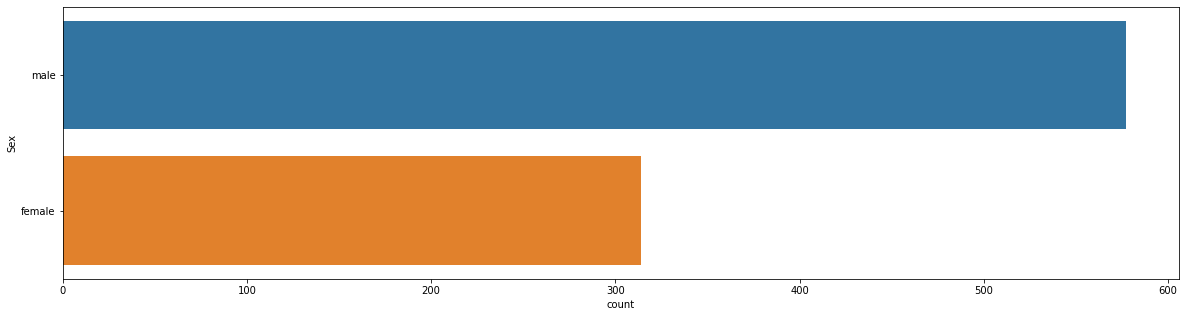

In [ ]:
fig =plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train);

In [ ]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
df_bin['Sex']= train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)

df_con['Sex']= train['Sex']

In [ ]:
#secondary DataFrame
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


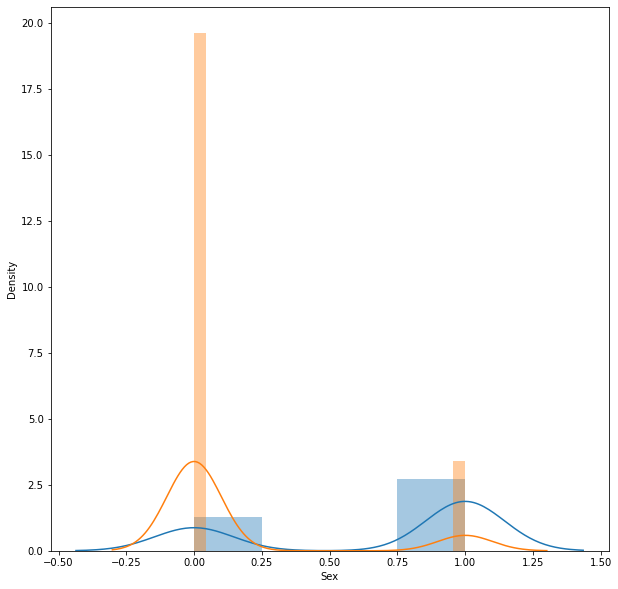

In [ ]:
fig = plt.figure(figsize=(10,10))

sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})

sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})


In [ ]:
dfSexVsSurvived=pd.DataFrame(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

<BarContainer object of 2 artists>

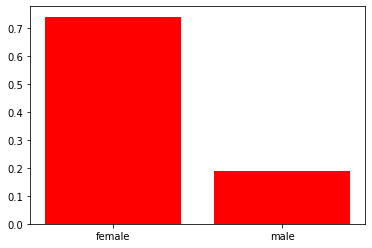

In [ ]:
dfSexVsSurvived['Survived']
plt.bar(dfSexVsSurvived['Sex'], dfSexVsSurvived['Survived'],color='Red') # vizualize the impact of sex on survived variable

In [ ]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [ ]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


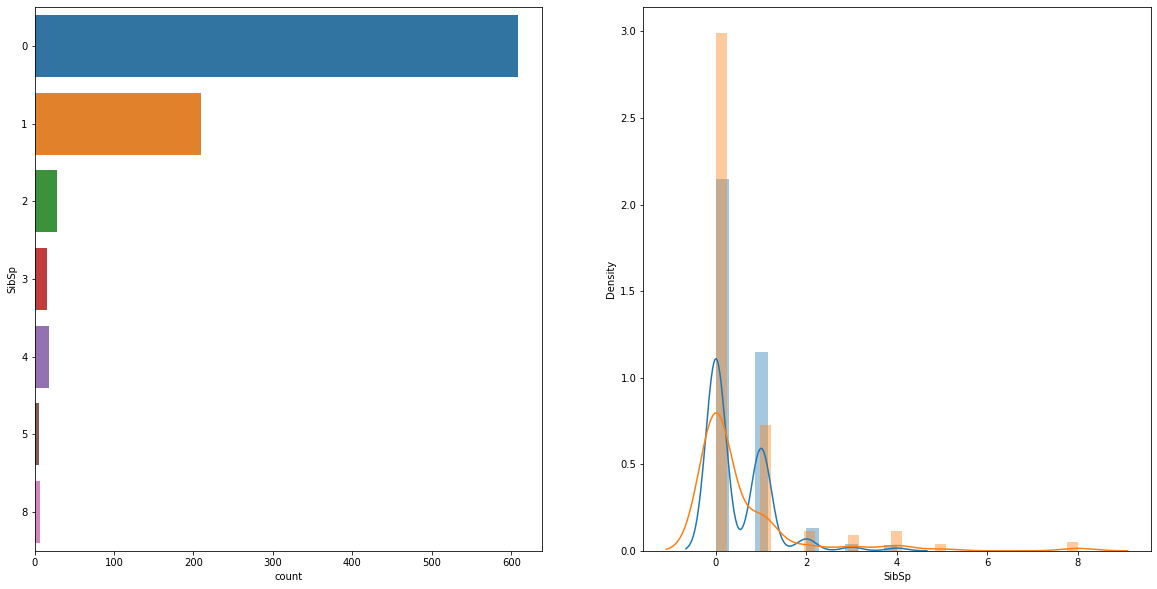

In [ ]:
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [ ]:
print(train.SibSp.isnull().sum())

0


In [ ]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

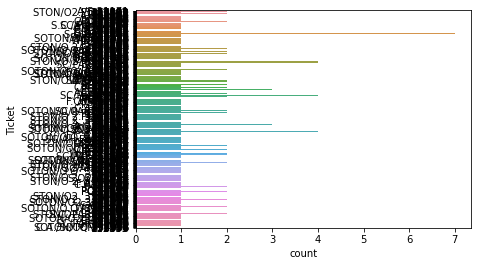

In [ ]:
sns.countplot(y="Ticket", data=train);

In [ ]:
print('Unique Ticket values:', len(train.Ticket.unique()))

Unique Ticket values: 681


In [ ]:
print(train.Fare.isnull().sum())

0


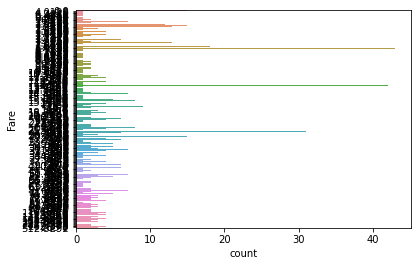

In [ ]:
sns.countplot(y="Fare", data=train) #checking missing value

In [ ]:
train.Fare.dtype

dtype('float64')

In [ ]:
print('Unique Fare values:', len(train.Fare.unique()))

Unique Fare values: 248


In [ ]:
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5)

In [ ]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Fare
0,0,3,0,1,"(-0.512, 102.466]"
1,1,1,1,1,"(-0.512, 102.466]"
2,1,3,1,0,"(-0.512, 102.466]"
3,1,1,1,1,"(-0.512, 102.466]"
4,0,3,0,0,"(-0.512, 102.466]"


In [ ]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Fare
0,0,3,male,1,7.2500
1,1,1,female,1,71.2833
2,1,3,female,0,7.9250
3,1,1,female,1,53.1000
4,0,3,male,0,8.0500


In [ ]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


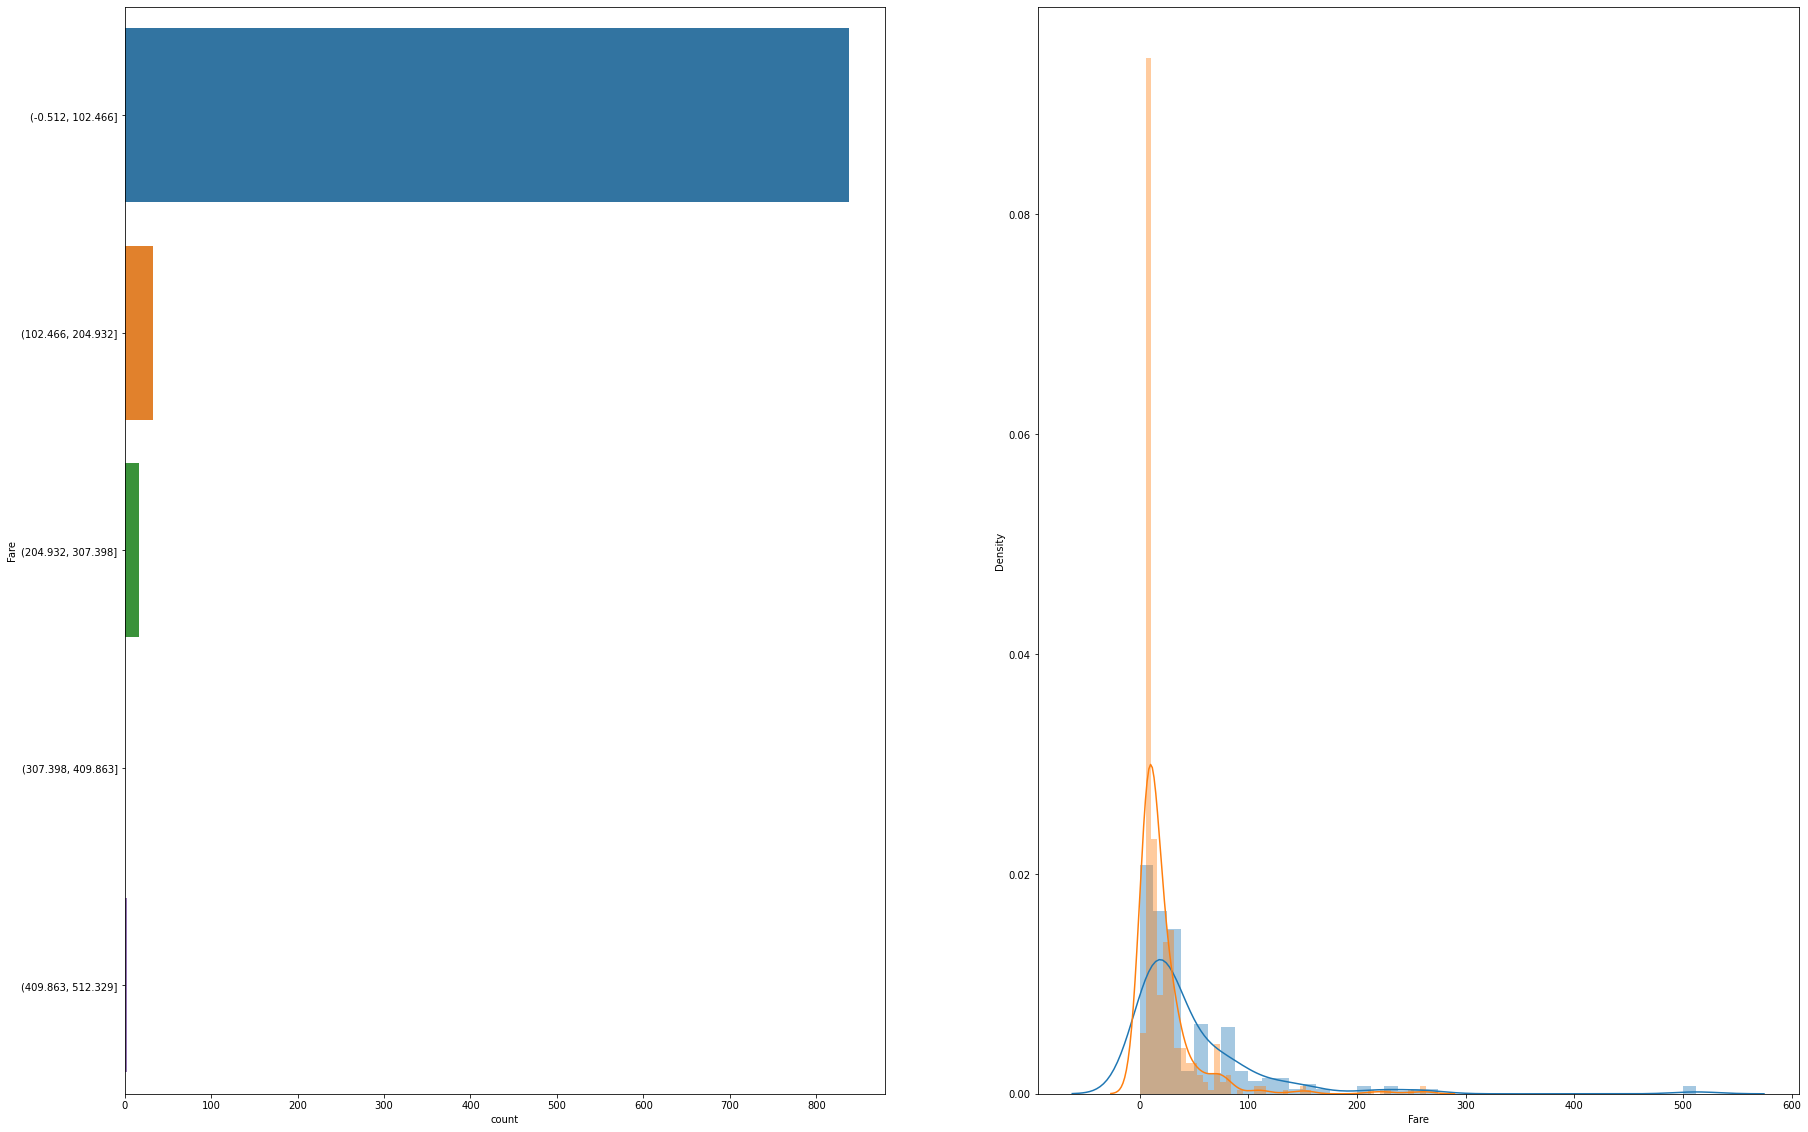

In [ ]:
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(30,20), 
                use_bin_df=True)

In [ ]:
train.Cabin.isnull().sum()

687

In [ ]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
C91            1
D37            1
B71            1
C62 C64        1
C45            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train.Embarked.isnull().sum()

2

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

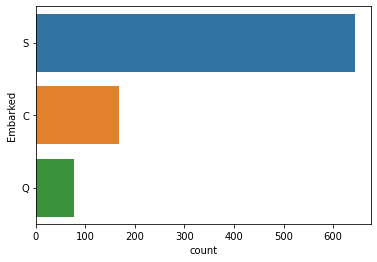

In [ ]:
sns.countplot(y="Embarked", data=train)

In [ ]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [ ]:
#drop null values
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])

In [ ]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,0,3,0,1,"(-0.512, 102.466]",S
1,1,1,1,1,"(-0.512, 102.466]",C
2,1,3,1,0,"(-0.512, 102.466]",S
3,1,1,1,1,"(-0.512, 102.466]",S
4,0,3,0,0,"(-0.512, 102.466]",S


In [ ]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,0,3,male,1,7.2500,S
1,1,1,female,1,71.2833,C
2,1,3,female,0,7.9250,S
3,1,1,female,1,53.1000,S
4,0,3,male,0,8.0500,S


In [ ]:
#One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()


,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [ ]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
df_con_enc.head()

,Survived,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,7.2500,0,0,1,0,1,0,0,1
1,1,1,71.2833,1,0,0,1,0,1,0,0
2,1,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
X_train=df_con_enc.drop('Survived',axis=1)
y_train=df_con_enc['Survived']
X_train.head()


,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,7.2500,0,0,1,0,1,0,0,1
1,1,71.2833,1,0,0,1,0,1,0,0
2,0,7.9250,0,0,1,1,0,0,0,1
3,1,53.1000,0,0,1,1,0,1,0,0
4,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
y_train.shape

(889,)

In [ ]:
selected_df = df_con_enc
selected_df.head()

,Survived,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,7.2500,0,0,1,0,1,0,0,1
1,1,1,71.2833,1,0,0,1,0,1,0,0
2,1,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
X_train = selected_df.drop('Survived', axis=1) 
y_train = selected_df.Survived 

print(X_train.shape, y_train.shape)

(889, 10) (889,)


In [ ]:
X_train.head()

,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,7.2500,0,0,1,0,1,0,0,1
1,1,71.2833,1,0,0,1,0,1,0,0
2,0,7.9250,0,0,1,1,0,0,0,1
3,1,53.1000,0,0,1,1,0,1,0,0
4,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
def fit_ml_algo(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train)* 100,2)

    train_pred = model_selection.cross_val_predict(algo,
                                                   X_train,
                                                   y_train,
                                                   cv=cv,
                                                   n_jobs =-1)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100,2)

    return train_pred,acc,acc_cv 

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.87
Accuracy CV 10-Fold: 79.19
Running Time: 0:00:01.797756


In [ ]:

start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.35
Accuracy CV 10-Fold: 76.49
Running Time: 0:00:00.172668


In [ ]:

start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.97
Accuracy CV 10-Fold: 78.07
Running Time: 0:00:00.082310


In [ ]:

start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.01
Accuracy CV 10-Fold: 81.33
Running Time: 0:00:00.093111


In [ ]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.73
Accuracy CV 10-Fold: 81.55
Running Time: 0:00:01.078795


We can see that decision tree has highest accuracy and cross validation results from our training results.

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
             'Linear SVC','Decision Tree', 'Gradiant Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_dt,
        acc_gbt,
        
    ]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,92.01
4,Gradiant Boosting Trees,86.73
0,KNN,83.35
1,Logistic Regression,79.87
2,Linear SVC,78.97


In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
             'Linear SVC','Decision Tree', 'Gradiant Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,  
        acc_cv_gaussian, 
        acc_cv_dt,
        acc_cv_gbt,
        
    ]})

cv_models.sort_values(by='Score', ascending=False)

,Model,Score
4,Gradiant Boosting Trees,81.55
3,Decision Tree,81.33
1,Logistic Regression,79.19
2,Linear SVC,78.07
0,KNN,76.49


In [ ]:
DecisionBoostingTree = DecisionTreeClassifier().fit(X_train, y_train)
acc = round(DecisionBoostingTree.score(X_train, y_train) * 100, 2)

# Cross Validation 
train_pred = model_selection.cross_val_predict(DecisionTreeClassifier(), 
                                              X_train, 
                                              y_train, 
                                              cv=10, 
                                              n_jobs = -1)

In [ ]:
# Feature Importance
def feature_importance(model, data):
 
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(30, 20))
    return fea_imp
  



,imp,col
5,0.000000,sex_female
7,0.000447,pclass_1
8,0.004401,pclass_2
3,0.006066,embarked_Q
2,0.011474,embarked_C
4,0.016880,embarked_S
0,0.064815,SibSp
9,0.101713,pclass_3
6,0.385015,sex_male
1,0.409190,Fare


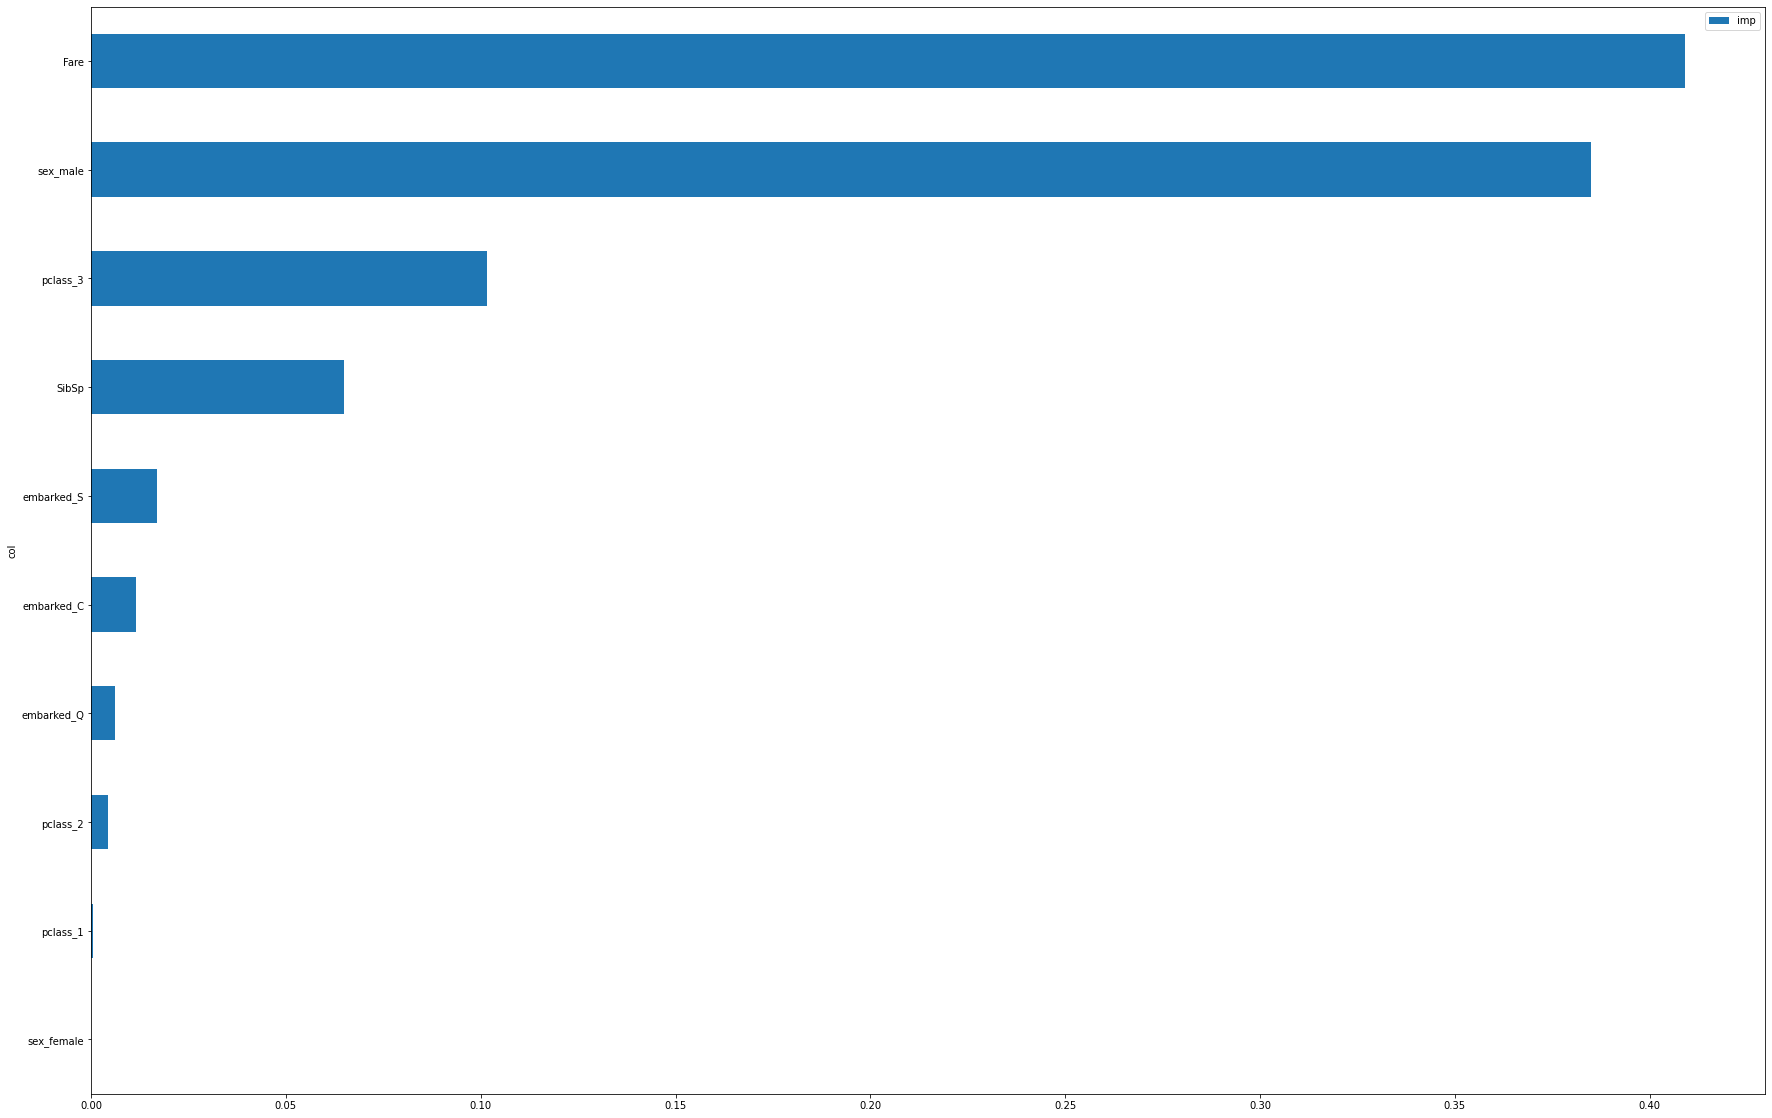

In [ ]:
# Plot the feature importance scores
feature_importance(DecisionBoostingTree, X_train)

In [ ]:
X_train.head()

,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,7.2500,0,0,1,0,1,0,0,1
1,1,71.2833,1,0,0,1,0,1,0,0
2,0,7.9250,0,0,1,1,0,0,0,1
3,1,53.1000,0,0,1,1,0,1,0,0
4,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
X_train.tail()

,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
886,0,13.00,0,0,1,0,1,0,1,0
887,0,30.00,0,0,1,1,0,1,0,0
888,1,23.45,0,0,1,1,0,0,0,1
889,0,30.00,1,0,0,0,1,1,0,0
890,0,7.75,0,1,0,0,1,0,0,1


In [ ]:
test['AgeExists']=test['Age'].apply(lambda x: 1 if x>0 else 0)
test['Age'].replace(np.NaN, train['Age'].mean(),inplace=True)
test['Fare']=test['Fare'].fillna(train['Fare'].mean())
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeExists        0
dtype: int64

In [ ]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeExists,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1,1,0,0,0,1


In [ ]:
wanted_test_columns = X_train.columns
print(wanted_test_columns)
testing_df=test[wanted_test_columns]
testing_df.head()


Index(['SibSp', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S', 'sex_female',
       'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')


,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,7.8292,0,1,0,0,1,0,0,1
1,1,7.0000,0,0,1,1,0,0,0,1
2,0,9.6875,0,1,0,0,1,0,1,0
3,0,8.6625,0,0,1,0,1,0,0,1
4,1,12.2875,0,0,1,1,0,0,0,1


In [ ]:
predictions = DecisionBoostingTree.predict(testing_df)

In [ ]:
predictions[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions 
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
submission.dtypes
submission['Survived'] = submission['Survived'].astype(int)
submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

let's check if our submission file matches kaggle's row length.

In [ ]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched.")

Submission dataframe is the same length as test (418 rows).


Now let's submit our file.

In [ ]:
submission.to_csv('DecisionTree_submission.csv', index=False)
print('Submission CSV')

Submission CSV


Importing Keggel score Image.
The score is : 0.77511

In [ ]:
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving submission_proof.PNG to submission_proof.PNG


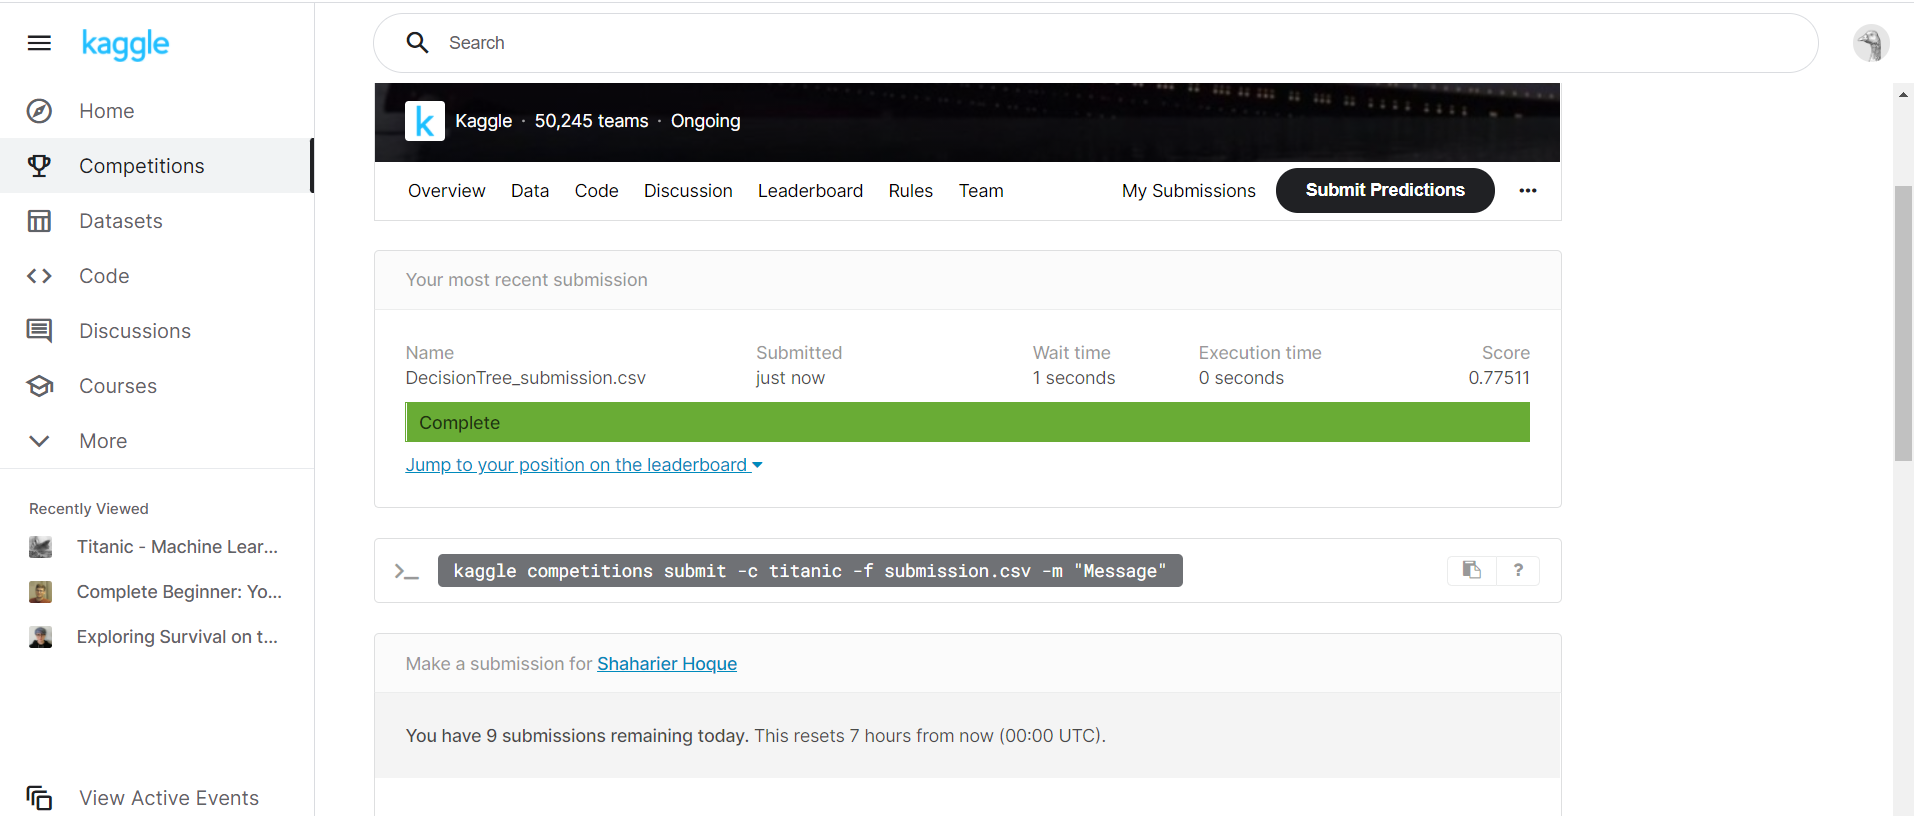

In [ ]:
Image('submission_proof.PNG',width = 1200)